In [2]:
import nibabel as nib 
import numpy as snp 
import matplotlib.pyplot as plt 
import os 
from scipy import ndimage
from tqdm import tqdm

### Check the following: 
1) Common resolution to resample to 
2) Impact of kernel after resampling for paired data

In [ ]:
path = "/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked"
voxel_sizes = []
for folder in os.listdir(path):
    for file in os.listdir(os.path.join(path, folder)):
        if file.endswith(".nii.gz"):
            image = nib.load(os.path.join(path, folder,file))
            voxel_sizes.append(image.header.get_zooms())

In [11]:
voxel_sizes

[(0.7382812, 0.7382812, 2.0),
 (0.5761719, 0.5761719, 2.0),
 (0.6445312, 0.6445312, 2.0),
 (0.546875, 0.546875, 2.0),
 (0.54296875, 0.54296875, 1.800003),
 (0.5273438, 0.5273438, 2.0),
 (0.66796875, 0.66796875, 1.800003),
 (0.7226562, 0.7226562, 1.800003),
 (0.625, 0.625, 2.0),
 (0.70703125, 0.70703125, 1.7999992),
 (0.6445312, 0.6445312, 2.0),
 (0.609375, 0.609375, 1.5),
 (0.6640625, 0.6640625, 2.0),
 (0.6640625, 0.6640625, 2.0),
 (0.5273438, 0.5273438, 2.0),
 (0.7421875, 0.7421875, 1.7999992),
 (0.6445312, 0.6445312, 2.0),
 (0.5273438, 0.5273438, 1.800003),
 (0.6367188, 0.6367188, 2.0),
 (0.6640625, 0.6640625, 2.0),
 (0.6601562, 0.6601562, 2.0),
 (0.6835938, 0.6835938, 1.7999992),
 (0.546875, 0.546875, 1.8000002),
 (0.625, 0.625, 1.7999992),
 (0.74609375, 0.74609375, 2.0),
 (0.7421875, 0.7421875, 2.0),
 (0.55078125, 0.55078125, 2.0),
 (0.7265625, 0.7265625, 2.0),
 (0.57421875, 0.57421875, 1.8000002),
 (0.6484375, 0.6484375, 1.800003),
 (0.73828125, 0.73828125, 2.0),
 (0.765625, 0.765

In [ ]:
#check for the voxel size that occurs the most
from collections import Counter
Counter(voxel_sizes).most_common()

[((0.6640625, 0.6640625, 2.0), 8),
 ((0.6445312, 0.6445312, 2.0), 4),
 ((0.5273438, 0.5273438, 2.0), 3),
 ((0.6835938, 0.6835938, 1.7999992), 3),
 ((0.6328125, 0.6328125, 2.0), 3),
 ((0.5664062, 0.5664062, 2.0), 3),
 ((0.7382812, 0.7382812, 2.0), 2),
 ((0.546875, 0.546875, 2.0), 2),
 ((0.625, 0.625, 2.0), 2),
 ((0.70703125, 0.70703125, 1.7999992), 2),
 ((0.6601562, 0.6601562, 2.0), 2),
 ((0.7421875, 0.7421875, 2.0), 2),
 ((0.7265625, 0.7265625, 2.0), 2),
 ((0.5859375, 0.5859375, 2.0), 2),
 ((0.640625, 0.640625, 2.0), 2),
 ((0.609375, 0.609375, 2.0), 2),
 ((0.68359375, 0.68359375, 2.0), 2),
 ((0.703125, 0.703125, 2.0), 2),
 ((0.5761719, 0.5761719, 2.0), 1),
 ((0.54296875, 0.54296875, 1.800003), 1),
 ((0.66796875, 0.66796875, 1.800003), 1),
 ((0.7226562, 0.7226562, 1.800003), 1),
 ((0.609375, 0.609375, 1.5), 1),
 ((0.7421875, 0.7421875, 1.7999992), 1),
 ((0.5273438, 0.5273438, 1.800003), 1),
 ((0.6367188, 0.6367188, 2.0), 1),
 ((0.546875, 0.546875, 1.8000002), 1),
 ((0.625, 0.625, 1.7999

In [55]:
import nibabel as nib
import numpy as np
from scipy.ndimage import zoom

def resample_nifti(input_path, target_voxel_size):
    # Load the NIfTI image
    img = nib.load(input_path)
    data = img.get_fdata()
    affine = img.affine
    header = img.header

    # Get the current voxel size
    current_voxel_size = header.get_zooms()

    # Calculate the resampling factor for each dimension
    resampling_factors = [current / target for current, target in zip(current_voxel_size, target_voxel_size)]

    # Resample the image data
    resampled_data = zoom(data, resampling_factors, order=3)  # Using cubic interpolation (order=3)

    # Calculate the new affine matrix
    new_affine = np.copy(affine)
    for i in range(3):
        new_affine[i, i] *= resampling_factors[i]

    # Print original and new voxel sizes and dimensions
    print(f"Original voxel size: {current_voxel_size}")
    print(f"Original dimensions: {data.shape}")
    print(f"New voxel size: {target_voxel_size}")
    print(f"New dimensions: {resampled_data.shape}")

    return resampled_data, new_affine, header

# Example usage
hard_image = '/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/119178/119178.nii.gz'
soft_image = '/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/soft_masked/119178/119178.nii.gz'
hard_data = nib.load(hard_image).get_fdata()
soft_data = nib.load(soft_image).get_fdata()
target_voxel_size = (1.0, 1.0, 1.0)  # Target voxel size in mm

resampled_data_hard, _,_ = resample_nifti(hard_image, target_voxel_size)
resampled_data_soft, _,_ = resample_nifti(soft_image, target_voxel_size)

resampled_data_hard.shape

Original voxel size: (0.625, 0.625, 2.0)
Original dimensions: (512, 512, 154)
New voxel size: (1.0, 1.0, 1.0)
New dimensions: (320, 320, 308)
Original voxel size: (0.625, 0.625, 2.0)
Original dimensions: (512, 512, 154)
New voxel size: (1.0, 1.0, 1.0)
New dimensions: (320, 320, 308)


(320, 320, 308)

(512, 512, 154)


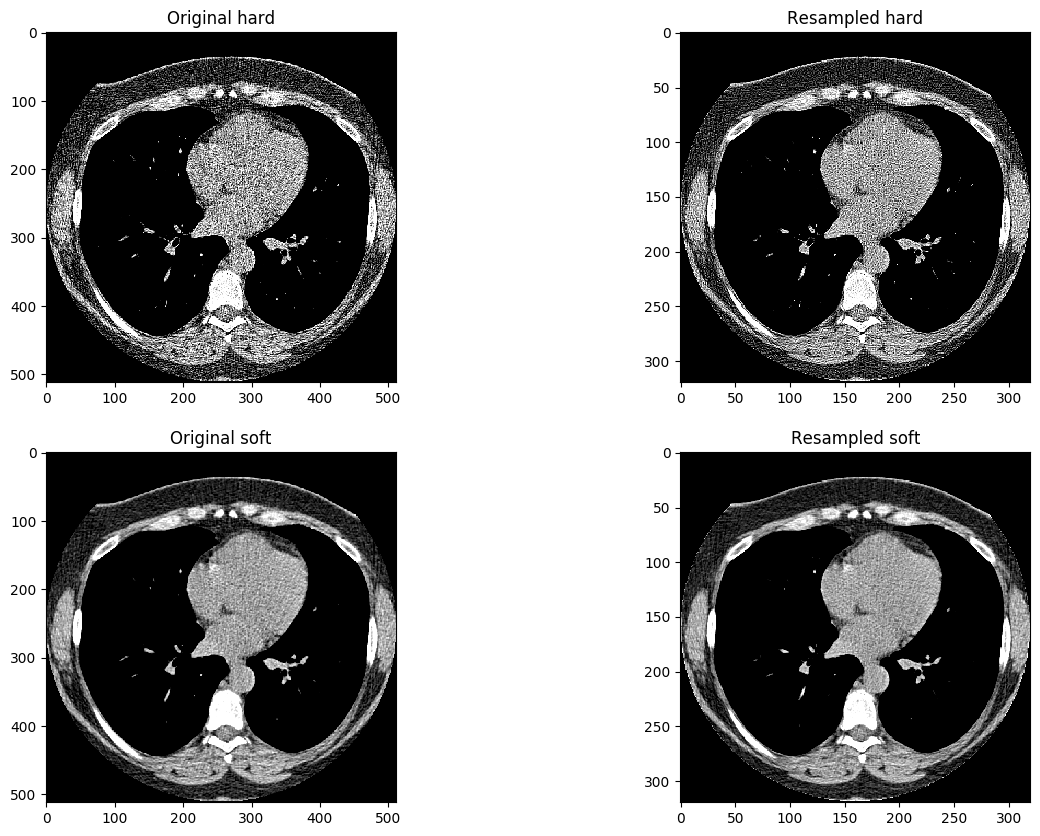

In [56]:
#plot the original and resampled images 
print(hard_data.shape)
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(np.rot90(hard_data[:, :, 76]), cmap='gray', vmin=-150, vmax=150)
plt.title('Original hard')
plt.subplot(2, 2, 2)
plt.imshow(np.rot90(resampled_data_hard[:, :, 153]), cmap='gray', vmin=-150, vmax=150)
plt.title('Resampled hard')
plt.subplot(2, 2, 3)
plt.imshow(np.rot90(soft_data[:, :, 76]), cmap='gray', vmin=-150, vmax=150)
plt.title('Original soft')
plt.subplot(2, 2, 4)
plt.imshow(np.rot90(resampled_data_soft[:, :, 153]), cmap='gray', vmin=-150, vmax=150)
plt.title('Resampled soft')
plt.show()

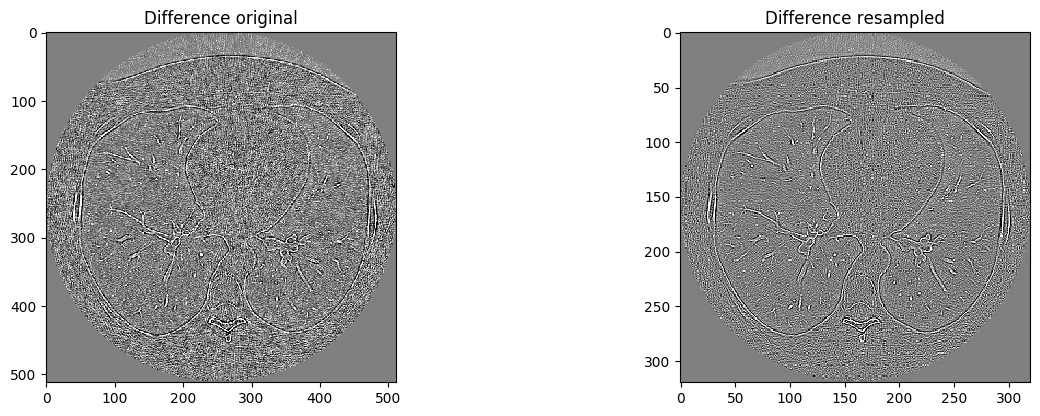

In [57]:
diff_original = hard_data - soft_data
diff_resampled = resampled_data_hard - resampled_data_soft

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(np.rot90(diff_original[:, :, 76]), cmap='gray', vmin=-150, vmax=150)
plt.title('Difference original')
plt.subplot(2, 2, 2)
plt.imshow(np.rot90(diff_resampled[:, :, 153]), cmap='gray', vmin=-150, vmax=150)
plt.title('Difference resampled')
plt.show()

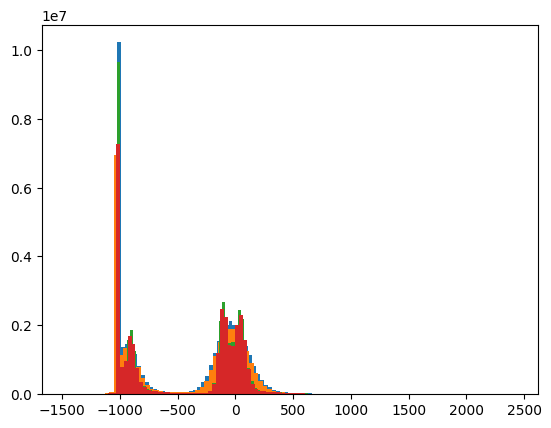

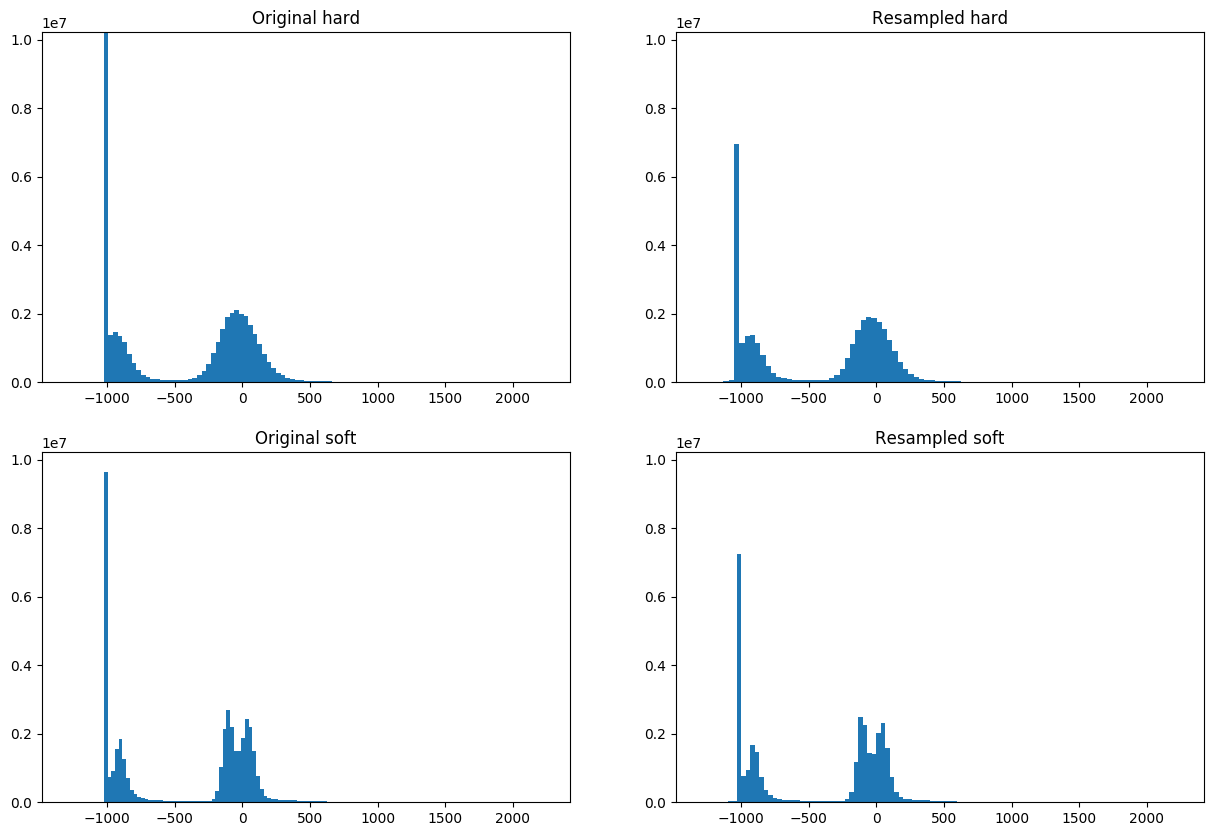

In [50]:
import matplotlib.pyplot as plt

# Calculate the x and y limits
all_data = [hard_data.flatten(), resampled_data_hard.flatten(), soft_data.flatten(), resampled_data_soft.flatten()]
x_min = min([data.min() for data in all_data])
x_max = max([data.max() for data in all_data])
y_max = max([plt.hist(data, bins=100)[0].max() for data in all_data])

# Plot the histograms with consistent limits
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(hard_data.flatten(), bins=100)
plt.title('Original hard')
plt.xlim(x_min, x_max)
plt.ylim(0, y_max)

plt.subplot(2, 2, 2)
plt.hist(resampled_data_hard.flatten(), bins=100)
plt.title('Resampled hard')
plt.xlim(x_min, x_max)
plt.ylim(0, y_max)

plt.subplot(2, 2, 3)
plt.hist(soft_data.flatten(), bins=100)
plt.title('Original soft')
plt.xlim(x_min, x_max)
plt.ylim(0, y_max)

plt.subplot(2, 2, 4)
plt.hist(resampled_data_soft.flatten(), bins=100)
plt.title('Resampled soft')
plt.xlim(x_min, x_max)
plt.ylim(0, y_max)

plt.show()